In [187]:
# 任意选一个你喜欢的整数，这能帮你得到稳定的结果
seed = 888

# 欢迎来到线性回归项目

若项目中的题目有困难没完成也没关系，我们鼓励你带着问题提交项目，评审人会给予你诸多帮助。

所有选做题都可以不做，不影响项目通过。如果你做了，那么项目评审会帮你批改，也会因为选做部分做错而判定为不通过。

其中非代码题可以提交手写后扫描的 pdf 文件，或使用 Latex 在文档中直接回答。

# 1 矩阵运算

## 1.1 创建一个 4*4 的单位矩阵

In [188]:
# 这个项目设计来帮你熟悉 python list 和线性代数
# 你不能调用任何NumPy以及相关的科学计算库来完成作业


# 本项目要求矩阵统一使用二维列表表示，如下：
A = [[1,2,3], 
     [2,3,3], 
     [1,2,5]]

B = [[1,2,3,5], 
     [2,3,3,5], 
     [1,2,5,1]]

# 向量也用二维列表表示
C = [[1],
     [2],
     [3]]

#TODO 创建一个 4*4 单位矩阵
I = [[1,0,0,0],
     [0,1,0,0],
     [0,0,1,0],
     [0,0,0,1]]

## 1.2 返回矩阵的行数和列数

In [189]:
# TODO 返回矩阵的行数和列数
def shape(M):
    return (len(M),len(M[0]))

In [190]:
# 运行以下代码测试你的 shape 函数
%run -i -e test.py LinearRegressionTestCase.test_shape

.
----------------------------------------------------------------------
Ran 1 test in 0.004s

OK


## 1.3 每个元素四舍五入到特定小数数位

In [191]:
# TODO 每个元素四舍五入到特定小数数位
# 直接修改参数矩阵，无返回值
def matxRound(M, decPts=4):
    for x in range(len(M)):
        for y in range(len(M[x])):
            M[x][y] = round(M[x][y], decPts)
    pass

In [192]:
# 运行以下代码测试你的 matxRound 函数
%run -i -e test.py LinearRegressionTestCase.test_matxRound

.
----------------------------------------------------------------------
Ran 1 test in 0.009s

OK


## 1.4 计算矩阵的转置

In [193]:
# TODO 计算矩阵的转置
def transpose(M):
    return [list(col) for col in zip(*M)]

In [194]:
# 运行以下代码测试你的 transpose 函数
%run -i -e test.py LinearRegressionTestCase.test_transpose

.
----------------------------------------------------------------------
Ran 1 test in 0.013s

OK


## 1.5 计算矩阵乘法 AB

In [195]:
# TODO 计算矩阵乘法 AB，如果无法相乘则raise ValueError
def matxMultiply(A, B):
    
    if len(A[0]) != len(B):
        raise ValueError('sorry, value error')
    
    result = [[0]*len(B[0]) for x in range(len(A))]
    for x in range(len(A)):
        for m in range(len(B[0])):
            for k in range(len(B)):
                result[x][m] += A[x][k]*B[k][m]
                     
    return result 

In [196]:
# 运行以下代码测试你的 matxMultiply 函数
%run -i -e test.py LinearRegressionTestCase.test_matxMultiply

.
----------------------------------------------------------------------
Ran 1 test in 0.085s

OK


---

# 2 Gaussign Jordan 消元法

## 2.1 构造增广矩阵

$ A = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n}\\
    a_{21}    & a_{22} & ... & a_{2n}\\
    a_{31}    & a_{22} & ... & a_{3n}\\
    ...    & ... & ... & ...\\
    a_{n1}    & a_{n2} & ... & a_{nn}\\
\end{bmatrix} , b = \begin{bmatrix}
    b_{1}  \\
    b_{2}  \\
    b_{3}  \\
    ...    \\
    b_{n}  \\
\end{bmatrix}$

返回 $ Ab = \begin{bmatrix}
    a_{11}    & a_{12} & ... & a_{1n} & b_{1}\\
    a_{21}    & a_{22} & ... & a_{2n} & b_{2}\\
    a_{31}    & a_{22} & ... & a_{3n} & b_{3}\\
    ...    & ... & ... & ...& ...\\
    a_{n1}    & a_{n2} & ... & a_{nn} & b_{n} \end{bmatrix}$

In [197]:
# TODO 构造增广矩阵，假设A，b行数相同
def augmentMatrix(A, b):
    return [ra + rb for ra,rb in zip(A,b)]

In [198]:
# 运行以下代码测试你的 augmentMatrix 函数
%run -i -e test.py LinearRegressionTestCase.test_augmentMatrix

.
----------------------------------------------------------------------
Ran 1 test in 0.007s

OK


## 2.2 初等行变换
- 交换两行
- 把某行乘以一个非零常数
- 把某行加上另一行的若干倍：

In [199]:
# TODO r1 <---> r2
# 直接修改参数矩阵，无返回值
def swapRows(M, r1, r2):
    tempV = M[r1]
    M[r1] = M[r2]
    M[r2] = tempV
    pass

In [200]:
# 运行以下代码测试你的 swapRows 函数
%run -i -e test.py LinearRegressionTestCase.test_swapRows

.
----------------------------------------------------------------------
Ran 1 test in 0.002s

OK


In [201]:
# TODO r1 <--- r1 * scale
# scale为0是非法输入，要求 raise ValueError
# 直接修改参数矩阵，无返回值
def scaleRow(M, r, scale):
    if (scale != 0):
        M[r] = [scale * i for i in M[r]]
    else:
        raise ValueError
    pass

In [202]:
# 运行以下代码测试你的 scaleRow 函数
%run -i -e test.py LinearRegressionTestCase.test_scaleRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


In [203]:
# TODO r1 <--- r1 + r2*scale
# 直接修改参数矩阵，无返回值
def addScaledRow(M, r1, r2, scale):
    if (scale != 0):
        if (0 <= r1) and (0 <= r2):
            M[r1] = [a + b * scale for a,b in zip(M[r1],M[r2])]    
    pass

In [204]:
# 运行以下代码测试你的 addScaledRow 函数
%run -i -e test.py LinearRegressionTestCase.test_addScaledRow

.
----------------------------------------------------------------------
Ran 1 test in 0.003s

OK


## 2.3  Gaussian Jordan 消元法求解 Ax = b

### 2.3.1 算法

步骤1 检查A，b是否行数相同

步骤2 构造增广矩阵Ab

步骤3 逐列转换Ab为化简行阶梯形矩阵 [中文维基链接](https://zh.wikipedia.org/wiki/%E9%98%B6%E6%A2%AF%E5%BD%A2%E7%9F%A9%E9%98%B5#.E5.8C.96.E7.AE.80.E5.90.8E.E7.9A.84-.7Bzh-hans:.E8.A1.8C.3B_zh-hant:.E5.88.97.3B.7D-.E9.98.B6.E6.A2.AF.E5.BD.A2.E7.9F.A9.E9.98.B5)
    
    对于Ab的每一列（最后一列除外）
        当前列为列c
        寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        如果绝对值最大值为0
            那么A为奇异矩阵，返回None (你可以在选做问题2.4中证明为什么这里A一定是奇异矩阵)
        否则
            使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            使用第二个行变换，将列c的对角线元素缩放为1
            多次使用第三个行变换，将列c的其他元素消为0
            
步骤4 返回Ab的最后一列

**注：** 我们并没有按照常规方法先把矩阵转化为行阶梯形矩阵，再转换为化简行阶梯形矩阵，而是一步到位。如果你熟悉常规方法的话，可以思考一下两者的等价性。

### 2.3.2 算法推演

为了充分了解Gaussian Jordan消元法的计算流程，请根据Gaussian Jordan消元法，分别手动推演矩阵A为***可逆矩阵***，矩阵A为***奇异矩阵***两种情况。

#### 推演示例 


$Ab = \begin{bmatrix}
    -7 & 5 & -1 & 1\\
    1 & -3 & -8 & 1\\
    -10 & -2 & 9 & 1\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & \frac{1}{5} & -\frac{9}{10} & -\frac{1}{10}\\
    0 & -\frac{16}{5} & -\frac{71}{10} & \frac{11}{10}\\
    0 & \frac{32}{5} & -\frac{73}{10} & \frac{3}{10}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & -\frac{43}{64} & -\frac{7}{64}\\
    0 & 1 & -\frac{73}{64} & \frac{3}{64}\\
    0 & 0 & -\frac{43}{4} & \frac{5}{4}\end{bmatrix}$

$ --> $
$\begin{bmatrix}
    1 & 0 & 0 & -\frac{3}{16}\\
    0 & 1 & 0 & -\frac{59}{688}\\
    0 & 0 & 1 & -\frac{5}{43}\end{bmatrix}$
    

#### 推演有以下要求:
1. 展示每一列的消元结果, 比如3*3的矩阵, 需要写三步
2. 用分数来表示
3. 分数不能再约分
4. 我们已经给出了latex的语法,你只要把零改成你要的数字(或分数)即可
5. 检查你的答案, 可以用[这个](http://www.math.odu.edu/~bogacki/cgi-bin/lat.cgi?c=sys), 或者后面通过单元测试后的`gj_Solve`

_你可以用python的 [fractions](https://docs.python.org/2/library/fractions.html) 模块辅助你的约分_

#### 以下开始你的尝试吧!

In [205]:
# 不要修改这里！
from helper import *
A = generateMatrix(3,seed,singular=False)
b = np.ones(shape=(3,1),dtype=int) # it doesn't matter
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

  3,  5,  9 ||  1 
 -3,  4,  3 ||  1 
  7,  6,  2 ||  1 


请按照算法的步骤3，逐步推演***可逆矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$


$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$
    
$...$

In [206]:
# 不要修改这里！
A = generateMatrix(3,seed,singular=True)
b = np.ones(shape=(3,1),dtype=int)
Ab = augmentMatrix(A.tolist(),b.tolist()) # 请确保你的增广矩阵已经写好了
printInMatrixFormat(Ab,padding=3,truncating=0)

 -2, -8, -2 ||  1 
 -6,  6,  6 ||  1 
 -5, -5,  1 ||  1 


请按照算法的步骤3，逐步推演***奇异矩阵***的变换。

在下面列出每一次循环体执行之后的增广矩阵。

要求：
1. 做分数运算
2. 使用`\frac{n}{m}`来渲染分数，如下：
 - $\frac{n}{m}$
 - $-\frac{a}{b}$


$ Ab = \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$

$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$
    
$ --> \begin{bmatrix}
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \\
    0 & 0 & 0 & 0 \end{bmatrix}$
    
$...$

### 2.3.3 实现 Gaussian Jordan 消元法

In [225]:
# TODO 实现 Gaussain Jordan 方法求解 Ax = b

""" Gaussian Jordan 方法求解 Ax = b.
    参数
        A: 方阵 
        b: 列向量
        decPts: 四舍五入位数，默认为4
        epsilon: 判读是否为0的阈值，默认 1.0e-16
        
    返回列向量 x 使得 Ax = b 
    返回None，如果 A，b 高度不同
    返回None，如果 A 为奇异矩阵
"""

def gj_Solve(A, b, decPts = 4, epsilon = 1.0e-16):
    
    # 检查A，b是否行数相同 return None
    if len(A) != len(b):
        raise None
        
    # 构造增广矩阵Ab
    Ab = augmentMatrix(A, b)
    
    # 返回矩阵的行数和列数: row && column
    row, column = shape(Ab)
    
    # 逐列转换Ab为化简行阶梯形矩阵，对于Ab的每一列（最后一列除外）
    # 当前列为列c
    for c in range (column - 1):
        
        r = c
        max_list = []
        r_index_list = []
        
        while(r < row):
            max_list.append(abs(Ab[r][c]))
            r_index_list.append(r)
            r += 1
        
        # 取最大值
        max_list_value = max(max_list)
        # 取max_value的索引值
        max_list_value_index = max_list.index(max_list_value)
        # 寻找列c中 对角线以及对角线以下所有元素（行 c~N）的绝对值的最大值
        max_row = r_index_list[max_list_value_index]
        
        # 如果绝对值最大值为0，那么A为奇异矩阵，返回None
        if max_list_value < epsilon:
            return None
        elif max_row != c:
            # 使用第一个行变换，将绝对值最大值所在行交换到对角线元素所在行（行c） 
            swapRows(Ab, c, max_row)

        # 计算缩放值
        scale = 1.0 / Ab[c][c]
        # 使用第二个行变换，将列c的对角线元素缩放为1
        scaleRow(Ab, c, scale)

        #多次使用第三个行变换，将列c的其他元素消为0
        i = 0
        while(i < row):
            if i == c:
                i += 1
                continue
            _Ab_scale = -Ab[i][c]
            # 修改参数矩阵
            addScaledRow(Ab, i, c, _Ab_scale)
            i += 1
            
    # 打印矩阵Ab
    printInMatrixFormat(Ab)
    
    # 返回Ab的最后一列
    return_list = []
    for r in range(row):
        return_list.append([round(Ab[r][-1], decPts)])
    print ("last_row_list: " + format(return_list))
    return return_list

In [226]:
# 运行以下代码测试你的 gj_Solve 函数
%run -i -e test.py LinearRegressionTestCase.test_gj_Solve

  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.081 
  0.000,  1.000,  0.000, -0.000,  0.000,  0.000 ||  0.089 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 || -0.244 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.014 
  0.000,  0.000,  0.000, -0.000,  1.000,  0.000 ||  0.268 
 -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 || -0.381 
last_row_list: [[-0.0808], [0.0895], [-0.2437], [0.0144], [0.2678], [-0.3806]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.042 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.602 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 || -0.212 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.615 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 || -0.398 
 -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 || -0.008 
last_row_list: [[-0.0418], [0.6018], [-0.2118], [0.6154], [-0.3978], [-0.0081]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || 10.517 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -9.066 

  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.121 
last_row_list: [[-0.427], [-0.5917], [-0.355], [0.605], [0.1214]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.877 
  0.000,  1.000,  0.000,  0.000,  0.000 || -0.006 
  0.000,  0.000,  1.000,  0.000,  0.000 || -0.204 
  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.803 
 -0.000, -0.000, -0.000, -0.000,  1.000 || -0.971 
last_row_list: [[0.8769], [-0.0056], [-0.2036], [0.8033], [-0.9712]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.481 
  0.000,  1.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -1.139 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.096 
  0.000,  0.000, -0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.590 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.232 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.360 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.0

  1.000,  0.000,  0.000 ||  0.205 
  0.000,  1.000,  0.000 || -0.217 
 -0.000, -0.000,  1.000 ||  0.024 
last_row_list: [[0.2048], [-0.2169], [0.0241]]
  1.000,  0.000,  0.000,  0.000,  0.000 || -0.072 
  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.298 
 -0.000, -0.000,  1.000,  0.000,  0.000 || -0.181 
  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.222 
  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.649 
last_row_list: [[-0.0724], [0.2976], [-0.1815], [0.2223], [0.6485]]
  1.000,  0.000,  0.000 || 10.000 
  0.000,  1.000,  0.000 || 21.000 
 -0.000, -0.000,  1.000 || -12.000
last_row_list: [[10.0], [21.0], [-12.0]]
  1.000,  0.000,  0.000,  0.000 ||  1.188 
 -0.000,  1.000,  0.000,  0.000 || -0.469 
 -0.000, -0.000,  1.000,  0.000 || -0.641 
  0.000,  0.000,  0.000,  1.000 ||  1.391 
last_row_list: [[1.1875], [-0.4688], [-0.6406], [1.3906]]
  1.000,  0.000,  0.000, -0.000,  0.000 ||  0.132 
  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.241 
  0.000,  0.000,  1.000,  0.000,  0.000 || -0.2

last_row_list: [[7.8558], [1.1299], [0.6356], [-8.4956], [9.9394], [-7.7896], [8.8003]]
  1.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -15.076
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000 || 27.242 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000 || -12.381
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000, -0.000,  0.000,  0.000 || 32.857 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || 11.569 
  0.000,  0.000, -0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 || -24.712
  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 || -18.449
  0.000,  0.000, -0.000,  0.000,  0.000,  0.000, -0.000,  1.000,  0.000 || -22.940
  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 || -31.162
last_row_list: [[-15.0765], [27.2418], [-12.3808], [32.8572], [11.5692], [-24.7121], [-18.449], [-22.9401], [-31.1625]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  0

last_row_list: [[0.4574], [0.8303], [-0.19], [0.9465], [0.0008], [-0.4069], [-1.0705], [-0.1365], [1.3514]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.623 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.175 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.531 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 || -0.173 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.052 
  0.000,  0.000,  0.000,  0.000, -0.000,  1.000 ||  0.197 
last_row_list: [[0.6227], [0.1754], [0.5308], [-0.1735], [0.052], [0.1971]]
  1.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.000 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.216 
  0.000, -0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.044 
  0.000, -0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.017 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -0.316 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000

  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.000 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.068 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.504 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.019 
 -0.000, -0.000, -0.000, -0.000,  1.000,  0.000 ||  0.029 
 -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 ||  0.111 
last_row_list: [[0.0004], [0.0683], [0.5044], [0.0191], [0.0289], [0.1106]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.286 
  0.000,  1.000,  0.000,  0.000,  0.000 || -1.072 
  0.000,  0.000,  1.000,  0.000,  0.000 ||  1.021 
 -0.000, -0.000, -0.000,  1.000,  0.000 ||  0.276 
 -0.000, -0.000, -0.000, -0.000,  1.000 ||  2.519 
last_row_list: [[0.2859], [-1.0719], [1.0209], [0.276], [2.5193]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.729 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.929 
  0.000,  0.000,  1.000,  0.000,  0.000, -0.000,  0.000 || -0.811 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,

  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.232 
  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.872 
 -0.000, -0.000,  1.000,  0.000,  0.000 || -0.671 
  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.039 
  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.043 
last_row_list: [[0.2323], [0.8719], [-0.6714], [0.0394], [0.0426]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  1.914 
  0.000,  1.000,  0.000,  0.000,  0.000 || 11.657 
  0.000,  0.000,  1.000,  0.000,  0.000 || -10.343
 -0.000, -0.000, -0.000,  1.000,  0.000 || 21.886 
  0.000,  0.000,  0.000,  0.000,  1.000 || -35.486
last_row_list: [[1.9143], [11.6571], [-10.3429], [21.8857], [-35.4857]]
  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000 || -0.708 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.756 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.013 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.410 
  0.000,  0.000,  0

last_row_list: [[0.4428], [0.7053], [-2.4305], [-1.2612], [1.1893], [-1.1946]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.218 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  7.267 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -1.113 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  2.544 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  2.970 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  6.613 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  1.671 
last_row_list: [[-0.2179], [7.2667], [-1.1126], [2.5443], [2.9705], [6.6134], [1.6709]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.835 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.382 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.062 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.690 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 

last_row_list: [[-0.0815], [-0.2158], [-0.0168], [-0.2758], [-0.3094]]
  1.000,  0.000,  0.000 ||  0.186 
  0.000,  1.000,  0.000 ||  0.077 
  0.000,  0.000,  1.000 ||  0.159 
last_row_list: [[0.1864], [0.0773], [0.1591]]
  1.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000, -0.000 ||  1.555 
  0.000,  1.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.342 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.258 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -1.502 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 || -0.522 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000, -0.000 ||  0.341 
 -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  1.000,  0.000 ||  0.102 
  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.575 
last_row_list: [[1.5546], [0.3418], [0.2579], [-1.5017], [-0.5221], [0.3407], [0.1021], [0.575]]
  1.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000 || -0.509 
  0.000,  1.00

last_row_list: [[-5.4859], [4.1561], [5.2208], [2.454], [-4.6916]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.438 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.557 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.968 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.807 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.232 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.631 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000,  0.000,  0.000 || -1.229 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000,  0.000 || -0.063 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  1.038 
last_row_list: [[1.4379], [1.5571], [1.9684], [0.8068], [0.2318], [0.6308], [-1.2286], [-0.0627], [1.0382]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -4.

 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 ||  0.040 
last_row_list: [[0.9553], [-1.1264], [-0.1566], [-0.666], [0.1549], [1.3707], [0.0402]]
  1.000,  0.000,  0.000,  0.000,  0.000 || -3.136 
 -0.000,  1.000,  0.000,  0.000,  0.000 || -6.560 
  0.000,  0.000,  1.000,  0.000,  0.000 || -6.217 
  0.000,  0.000,  0.000,  1.000,  0.000 ||  5.644 
  0.000,  0.000,  0.000,  0.000,  1.000 ||  9.010 
last_row_list: [[-3.1357], [-6.5597], [-6.2166], [5.6445], [9.0101]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.366 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.292 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.470 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.373 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.871 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.005 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.0

 -0.000, -0.000, -0.000, -0.000,  1.000 || -0.843 
last_row_list: [[-0.4334], [0.4948], [0.9751], [0.3016], [-0.843]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.227 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.042 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.228 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.344 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.020 
 -0.000, -0.000, -0.000, -0.000, -0.000,  1.000,  0.000,  0.000 || -0.744 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.960 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.670 
last_row_list: [[0.2269], [-0.0423], [-0.2276], [0.3444], [0.0201], [-0.7439], [0.9603], [0.6695]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -2.225 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.886 
  0.000,  0.000,  1.000,  0.000, 

  1.000,  0.000, -0.000,  0.000,  0.000 ||  0.429 
  0.000,  1.000, -0.000,  0.000, -0.000 || -0.414 
  0.000,  0.000,  1.000,  0.000, -0.000 || -0.774 
  0.000,  0.000,  0.000,  1.000, -0.000 || -0.113 
 -0.000, -0.000, -0.000, -0.000,  1.000 || -0.623 
last_row_list: [[0.4292], [-0.4136], [-0.7738], [-0.1129], [-0.6234]]
  1.000,  0.000,  0.000,  0.000 ||  0.557 
  0.000,  1.000,  0.000,  0.000 || -0.483 
  0.000,  0.000,  1.000,  0.000 || -0.461 
 -0.000, -0.000, -0.000,  1.000 || -0.404 
last_row_list: [[0.5572], [-0.4827], [-0.4611], [-0.4039]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  1.565 
  0.000,  1.000,  0.000,  0.000,  0.000 || -1.245 
  0.000,  0.000,  1.000,  0.000,  0.000 || -0.769 
  0.000,  0.000,  0.000,  1.000,  0.000 ||  1.765 
 -0.000, -0.000, -0.000, -0.000,  1.000 || -2.110 
last_row_list: [[1.565], [-1.2455], [-0.7693], [1.7654], [-2.1105]]
  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.137 
  0.000,  1.000,  0.000,  0.000,  0.000 || -1.200 
  0.000,  0.000,  1

last_row_list: [[-0.4091], [-0.7955], [-0.2727]]
  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000 ||  0.997 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.160 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  0.018 
  0.000,  0.000,  0.000,  1.000,  0.000, -0.000,  0.000 ||  0.472 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.048 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  0.960 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.582 
last_row_list: [[0.9975], [-0.1595], [0.0176], [0.4721], [0.0479], [0.9602], [0.5816]]
  1.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.930 
  0.000,  1.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  3.722 
  0.000,  0.000,  1.000, -0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  5.630 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  7.105 
  0.000,  0.000,  0.000, -0.000,  1.000,  0.000,  0.000,  0.000

  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.387 
last_row_list: [[0.188], [-0.018], [-0.3936], [0.0952], [0.3866]]
  1.000, -0.000, -0.000,  0.000,  0.000,  0.000 ||  0.828 
  0.000,  1.000, -0.000,  0.000,  0.000,  0.000 ||  0.299 
  0.000, -0.000,  1.000,  0.000,  0.000,  0.000 ||  0.903 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.115 
 -0.000,  0.000,  0.000, -0.000,  1.000,  0.000 || -0.679 
 -0.000, -0.000,  0.000, -0.000, -0.000,  1.000 || -0.913 
last_row_list: [[0.828], [0.299], [0.9028], [0.1146], [-0.6788], [-0.9127]]
  1.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000 || -1.204 
  0.000,  1.000,  0.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000 || -1.222 
  0.000,  0.000,  1.000,  0.000, -0.000,  0.000,  0.000,  0.000,  0.000 || -0.263 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.604 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -0.380 
 -0.000, -0.000, -0.000, -0.000,  0.00

last_row_list: [[1.0123], [-2.1111], [0.3457]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.693 
 -0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -0.736 
 -0.000, -0.000,  1.000,  0.000,  0.000,  0.000 || -0.267 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  2.389 
 -0.000, -0.000, -0.000, -0.000,  1.000,  0.000 || -1.286 
 -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 || -0.374 
last_row_list: [[0.6932], [-0.7356], [-0.2665], [2.3894], [-1.2857], [-0.3743]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.302 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -4.879 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -2.254 
 -0.000, -0.000, -0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -7.979 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 || -9.055 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.499 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000,  0.000 || -1

last_row_list: [[-0.051], [-0.2056], [0.7844], [-0.6415], [-0.5202]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000 ||  0.239 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000, -0.000 ||  1.818 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000 ||  0.099 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000, -0.000 ||  0.741 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000, -0.000,  0.000 ||  0.304 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000, -0.000,  0.000 ||  0.997 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 || -1.227 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 ||  1.938 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  0.000,  1.000 ||  0.018 
last_row_list: [[0.2393], [1.8185], [0.0986], [0.741], [0.3038], [0.9967], [-1.2271], [1.9382], [0.0185]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.866 
  0.000,  1.000,  0

last_row_list: [[0.7667], [-1.0374], [0.3448], [0.5693], [-0.4242], [0.1546], [-0.1381], [0.3431], [-0.5065]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.328 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.415 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -2.010 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -0.051 
 -0.000, -0.000, -0.000, -0.000,  1.000,  0.000,  0.000,  0.000 || -0.139 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 || -0.372 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000,  0.000 ||  0.152 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 || -0.517 
last_row_list: [[0.3277], [1.4153], [-2.0102], [-0.0509], [-0.1391], [-0.3717], [0.1516], [-0.5171]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  1.281 
  0.000,  1.000,  0.000,  0.000,  0.000, -0.000 || -0.011 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.630 
  0.000,  0.

last_row_list: [[0.3585], [-0.3116], [-0.5727], [-0.1226]]
  1.000,  0.000,  0.000 || -0.091 
 -0.000,  1.000,  0.000 || -0.182 
  0.000,  0.000,  1.000 ||  0.182 
last_row_list: [[-0.0909], [-0.1818], [0.1818]]
  1.000,  0.000,  0.000 || -1.069 
  0.000,  1.000,  0.000 || -0.559 
  0.000,  0.000,  1.000 ||  1.294 
last_row_list: [[-1.0686], [-0.5588], [1.2941]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000 || -0.299 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000 ||  0.203 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.215 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -0.064 
  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.756 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 ||  0.117 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 || -0.935 
 -0.000, -0.000, -0.000, -0.000, -0.000, -0.000, -0.000,  1.000 || -0.160 
last_row_list: [[-0.2995], [0.2029]

  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000 || -0.196 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000, -0.000 || -0.130 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.744 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.440 
  0.000,  0.000, -0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 ||  1.128 
  0.000,  0.000, -0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000 ||  0.258 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000, -0.000 || -0.394 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000, -0.000 || -1.151 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000 ||  0.029 
last_row_list: [[-0.1958], [-0.1302], [0.7444], [-0.4402], [1.1281], [0.2582], [-0.3941], [-1.1515], [0.0291]]
  1.000,  0.000,  0.000,  0.000,  0.000 || -0.508 
  0.000,  1.000,  0.000,  0.000,  0.000 || -0.493 
 -0.000, -0.000,  1.000,  0.000,  0.000 

.

last_row_list: [[-1.6142], [1.407], [0.4836], [1.092], [0.6186], [-1.1832], [1.0515]]
  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.891 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -2.728 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 ||  0.533 
  0.000,  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000 || -1.566 
  0.000,  0.000,  0.000, -0.000,  1.000,  0.000,  0.000,  0.000 ||  0.482 
  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000,  0.000 || -3.960 
  0.000,  0.000,  0.000,  0.000,  0.000,  0.000,  1.000,  0.000 || -2.186 
 -0.000, -0.000, -0.000,  0.000, -0.000, -0.000, -0.000,  1.000 || -1.704 
last_row_list: [[-0.8915], [-2.728], [0.5331], [-1.5662], [0.4818], [-3.9596], [-2.186], [-1.7042]]
  1.000,  0.000,  0.000,  0.000,  0.000, -0.000,  0.000,  0.000 || -1.243 
  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000,  0.000 || -0.534 
  0.000,  0.000,  1.000,  0.000,  0.000,  0.000,  0.000,  0.000 


----------------------------------------------------------------------
Ran 1 test in 10.821s

OK


## (选做) 2.4 算法正确判断了奇异矩阵：

在算法的步骤3 中，如果发现某一列对角线和对角线以下所有元素都为0，那么则断定这个矩阵为奇异矩阵。

我们用正式的语言描述这个命题，并证明为真。

证明下面的命题：

**如果方阵 A 可以被分为4个部分: ** 

$ A = \begin{bmatrix}
    I    & X \\
    Z    & Y \\
\end{bmatrix} , \text{其中 I 为单位矩阵，Z 为全0矩阵，Y 的第一列全0}$，

**那么A为奇异矩阵。**

提示：从多种角度都可以完成证明
- 考虑矩阵 Y 和 矩阵 A 的秩
- 考虑矩阵 Y 和 矩阵 A 的行列式
- 考虑矩阵 A 的某一列是其他列的线性组合

TODO 证明：

# 3  线性回归

## 3.1 随机生成样本点

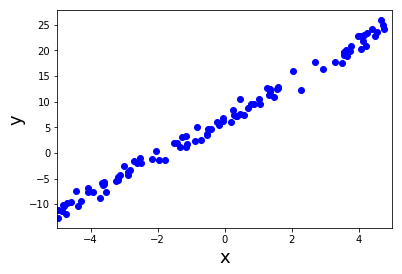

In [209]:
# 不要修改这里！
# 运行一次就够了！
from helper import *
from matplotlib import pyplot as plt
%matplotlib inline

X,Y = generatePoints(seed,num=100)

## 可视化
plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.show()

## 3.2 拟合一条直线

### 3.2.1 猜测一条直线

/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/deprecation.py:106: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  warnings.warn(message, mplDeprecation, stacklevel=1)


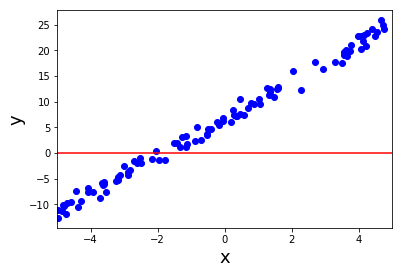

In [210]:
#TODO 请选择最适合的直线 y = mx + b
m1 = 0
b1 = 0

# 不要修改这里！
plt.xlim((-5,5))
x_vals = plt.axes().get_xlim()
y_vals = [m1*x+b1 for x in x_vals]
plt.plot(x_vals, y_vals, '-', color='r')

plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')

plt.show()

### 3.2.2 计算平均平方误差 (MSE)

我们要编程计算所选直线的平均平方误差(MSE), 即数据集中每个点到直线的Y方向距离的平方的平均数，表达式如下：
$$
MSE = \frac{1}{n}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

In [211]:
# TODO 实现以下函数并输出所选直线的MSE

def calculateMSE(X,Y,m,b):
    if len(X) == len(Y) and len(X) != 0:
        n = len(X)
        sum_list = [(Y[i] - m * X[i] - b) ** 2 for i in range(n)]
        fn = float(n)
        return sum(sum_list) / fn
    else:
        raise ValueError

print(calculateMSE(X, Y, m1, b1))

151.38656579668776


### 3.2.3 调整参数 $m, b$ 来获得最小的平方平均误差

你可以调整3.2.1中的参数 $m1,b1$ 让蓝点均匀覆盖在红线周围，然后微调 $m1, b1$ 让MSE最小。

## 3.3 (选做) 找到参数 $m, b$ 使得平方平均误差最小

**这一部分需要简单的微积分知识(  $ (x^2)' = 2x $ )。因为这是一个线性代数项目，所以设为选做。**

刚刚我们手动调节参数，尝试找到最小的平方平均误差。下面我们要精确得求解 $m, b$ 使得平方平均误差最小。

定义目标函数 $E$ 为
$$
E = \frac{1}{2}\sum_{i=1}^{n}{(y_i - mx_i - b)^2}
$$

因为 $E = \frac{n}{2}MSE$, 所以 $E$ 取到最小值时，$MSE$ 也取到最小值。要找到 $E$ 的最小值，即要找到 $m, b$ 使得 $E$ 相对于 $m$, $E$ 相对于 $b$ 的偏导数等于0. 

因此我们要解下面的方程组。

$$
\begin{cases}
\displaystyle
\frac{\partial E}{\partial m} =0 \\
\\
\displaystyle
\frac{\partial E}{\partial b} =0 \\
\end{cases}
$$

### 3.3.1 计算目标函数相对于参数的导数
首先我们计算两个式子左边的值

证明/计算：
$$
\frac{\partial E}{\partial m} = \sum_{i=1}^{n}{-x_i(y_i - mx_i - b)}
$$

$$
\frac{\partial E}{\partial b} = \sum_{i=1}^{n}{-(y_i - mx_i - b)}
$$

TODO 证明:

### 3.3.2 实例推演

现在我们有了一个二元二次方程组

$$
\begin{cases}
\displaystyle
\sum_{i=1}^{n}{-x_i(y_i - mx_i - b)} =0 \\
\\
\displaystyle
\sum_{i=1}^{n}{-(y_i - mx_i - b)} =0 \\
\end{cases}
$$

为了加强理解，我们用一个实际例子演练。

我们要用三个点 $(1,1), (2,2), (3,2)$ 来拟合一条直线 y = m*x + b, 请写出

- 目标函数 $E$, 
- 二元二次方程组，
- 并求解最优参数 $m, b$

TODO 写出目标函数，方程组和最优参数

### 3.3.3 将方程组写成矩阵形式

我们的二元二次方程组可以用更简洁的矩阵形式表达，将方程组写成矩阵形式更有利于我们使用 Gaussian Jordan 消元法求解。

请证明 
$$
\begin{bmatrix}
    \frac{\partial E}{\partial m} \\
    \frac{\partial E}{\partial b} 
\end{bmatrix} = X^TXh - X^TY
$$

其中向量 $Y$, 矩阵 $X$ 和 向量 $h$ 分别为 :
$$
Y =  \begin{bmatrix}
    y_1 \\
    y_2 \\
    ... \\
    y_n
\end{bmatrix}
,
X =  \begin{bmatrix}
    x_1 & 1 \\
    x_2 & 1\\
    ... & ...\\
    x_n & 1 \\
\end{bmatrix},
h =  \begin{bmatrix}
    m \\
    b \\
\end{bmatrix}
$$

TODO 证明:

至此我们知道，通过求解方程 $X^TXh = X^TY$ 来找到最优参数。这个方程十分重要，他有一个名字叫做 **Normal Equation**，也有直观的几何意义。你可以在 [子空间投影](http://open.163.com/movie/2010/11/J/U/M6V0BQC4M_M6V2AJLJU.html) 和 [投影矩阵与最小二乘](http://open.163.com/movie/2010/11/P/U/M6V0BQC4M_M6V2AOJPU.html) 看到更多关于这个方程的内容。

### 3.4 求解 $X^TXh = X^TY$ 

在3.3 中，我们知道线性回归问题等价于求解 $X^TXh = X^TY$ (如果你选择不做3.3，就勇敢的相信吧，哈哈)

In [212]:
# TODO 实现线性回归
'''
参数：X, Y 存储着一一对应的横坐标与纵坐标的两个一维数组
返回：m，b 浮点数
'''
def linearRegression(X,Y):
    X = [[x, 1] for x in X]
    Y = [[y] for y in Y]
    XT = transpose(X)
    A = matxMultiply(XT, X)
    b = matxMultiply(XT, Y)
    result_list = gj_Solve(A, b)
    return result_list[0][0], result_list[1][0]

m2, b2 = linearRegression(X, Y)
assert isinstance(m2, float),"m is not a float"
assert isinstance(b2, float),"b is not a float"
print(m2, b2)

3.6419 6.6856


你求得的回归结果是什么？
请使用运行以下代码将它画出来。

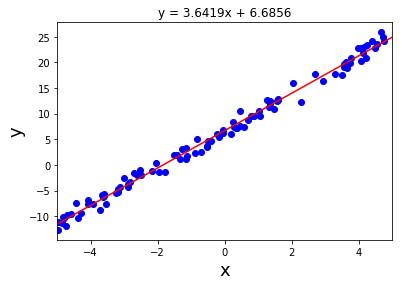

In [213]:
# 请不要修改下面的代码
x1,x2 = -5,5
y1,y2 = x1*m2+b2, x2*m2+b2

plt.xlim((-5,5))
plt.xlabel('x',fontsize=18)
plt.ylabel('y',fontsize=18)
plt.scatter(X,Y,c='b')
plt.plot((x1,x2),(y1,y2),'r')
plt.title('y = {m:.4f}x + {b:.4f}'.format(m=m2,b=b2))
plt.show()

你求得的回归结果对当前数据集的MSE是多少？

In [214]:
print(calculateMSE(X,Y,m2,b2))

1.0368295533628196
